### Импорт matplotlib

Стандартные сокращения для импортов библиотеки Matplotlib:

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt

Чаще всего мы будем использовать интерфейс **plt**

### Настройка стилей

Для выбора подходящих стилей для наших графиков мы будем применять директиву **plt.style**. В следующем фрагменте кода мы задаем директиву **classic**, которая обеспечит в создаваемых нами графиках классический стиль библиотеки Matplotlib:

In [2]:
plt.style.use('classic')

В данном разделе мы будем настраивать этот стиль по мере необходимости. Обратите внимание, что таблицы стилей поддерживаются версией 1.5 библиотеки Matplotlib. В более ранних версиях доступен только стиль по умолчанию. Дальнейшую информацию о таблицах стилей см. в разделе "Пользовательские настройки Matplotlib: конфигурации и таблицы стилей".

## Использовать show() или не использовать? Как отображать свои графики.

Визуализация, которую не видно, особой пользы не несет, но то, в каком виде вы увидите графики библиотеки Matplotlib, зависит от контекста. Имеется три возможных контекста:
* использование Matplotlib в сценарии;
* в терминале оболочки IPyton
* в блокноте Jupyter

### Построение графиков из сценария

Функция **plt.show()** будет полезна при использовании библиотеки Matplotlib изнутри сценария. Она запускает цикл ожидания события, ищет все активные в настоящий момент объекты графиков и открывает одно или несколько интерактивных окон для отображения графика (графиков)

Допустим, у нас имеется файл *myplot.py*, содержащий следующее:
```Python
# --- файл: myplot.py ---
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 10, 100)

plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x))

plt.show()
```
Далее можно запустить этот сценарий из командной строки, что приведет к открытию окна с нашим графиком.

Команда plt.show() выполняет "под капотом" много разной работы, так как ей необходимо взаимодействовать с интерактивной графической прикладной частью системы. Детали этой операции различаются в зависимости от операционной системы.

**Одно важное замечание:** команду **plt.show()** следует использовать только один раз за сеанс работы с Python, и чаще всего ее можно увидеть в самом конце сценария. Выполнение нескольких команд show() может привести к непредсказуемому поведению в зависимости от прикладной части, так что лучше избегать этого.

### Построение графиков из командной оболочки IPython

Очень удобно использовать Matplotlib интерактивно из командной оболочки IPython. Для этого необходимо ее перевести в соответствующий режим "магической" командой **%matplotlib**:

In [3]:
%matplotlib

Using matplotlib backend: Qt5Agg


После этого любая команда **plot** приведет к открытию окна графика с возможностью выполнения дальнейших команд для его изменения. Некоторые изменения (например, модификация свойств уже нарисованных линий) не будут отрисовываться автоматически. Чтобы добится этого необходимо воспользоваться командой **plt.draw()**. Выполнять команду plt.show() в режиме Matplotlib необязательно.

### Построение графиков из блокнота Jupyter

Блокнот Jupyter - браузерный интерактивный инструмент для анализа данных, допускающий совмещение комментариев, кода, графики, элементов HTML и многого другого в единый исполняемый документ.

Интерактивное построение графиков в блокноте Jupyter возможно с помощью команды %matplotlib, работает аналогично командной оболочке IPython. В блокноте Jupyter появляется возможность включения графики непосредственно в блокнот с двумя возможными альтернативами:
* использование команды %matplotlib notebook приведет к включению в блокнот интерактивных графиков
* выполнение команды %matplotlib inline приведет к включению в блокнот статических изображений графиков.

Мы будем использовать команду %matplotlib inline:

In [4]:
%matplotlib inline

После выполнения этой команды (которое нужно произвести только один раз за сеанс/для одного ядра Python) все создающие графики блоки в блокноте будут включать PNG-изображения итогового графика

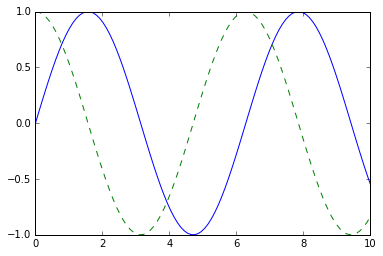

In [5]:
import numpy as np

x = np.linspace(0, 10, 100)

fig = plt.figure()
plt.plot(x, np.sin(x), '-')
plt.plot(x, np.cos(x), '--');

## Сохранение рисунков в файл

Умение сохранять рисунки в файлы различных форматов - одна из возможностей библиотеки Matplotlib. Например, сохранить предыдущий рисунок в файл PNG можно с помощью команды **savefig()**:

In [6]:
fig.savefig('my_figure.png')

В текущем рабочем каталоге появился файл с названием my_figure.png

Чтобы убедиться, что содержимое этого файла соответствует нашим ожиданиям, воспользуемся объектом Image оболочки IPython для отображения его содержимого.

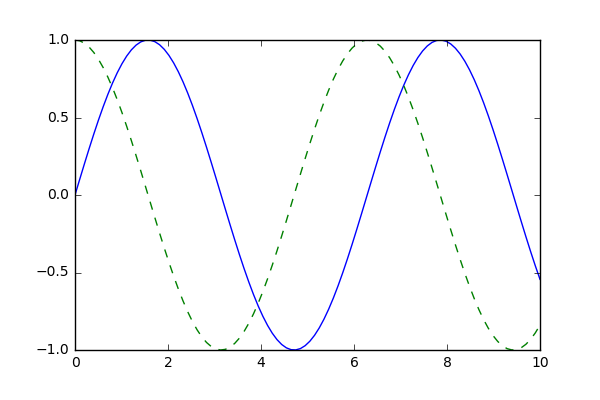

In [12]:
from IPython.display import Image
Image('my_figure.png')

Команда **savefig()** определяет формат файла, исходя из расширения заданного имени файла. В зависимости от установленной в системе прикладной части может поддерживаться множество различных форматов файлов. Вывести список поддерживаемых форматов файлов можно следующим образом:

In [13]:
fig.canvas.get_supported_filetypes()

{'ps': 'Postscript',
 'eps': 'Encapsulated Postscript',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'jpg': 'Joint Photographic Experts Group',
 'jpeg': 'Joint Photographic Experts Group',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format'}

Обратим внимание, что при сохранении рисунка необязательно использовать команду plt.show() или другие команды, обсуждавшиеся ранее.

## Два интерфейса по цене одного

Библиотеки Matplotlib содержит два интерфейса:
- удобный MATLAB-подобный интерфейс, основанный на сохранении состояния
- объектно-ориентированный интерфейс, обладающий большими возможностями

Рассмотрим вкратце различия между ними:

### Интерфейс в стиле MATLAB

Библиотека Matplotlib изначально была написана как альтернативный вариант (на языке Python) для пользователей пакета MATLAB, и значительная часть ее синтаксиса отражает этот факт. MATLAB-подобные инструменты содержатся в интерфейсе **pyplot (plt)**. Например следующий код, вероятно, выглядит довольно знакомо пользователям MATLAB: 

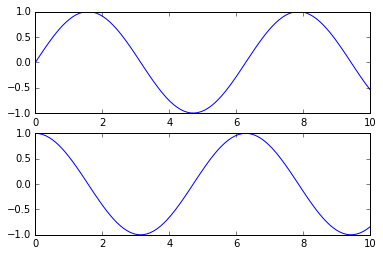

In [14]:
plt.figure() # Создаем рисунок для графика

# Создаем первую из двух областей графика и задаем текущую ось
plt.subplot(2, 1, 1) # (rows, columns, panel number)
plt.plot(x, np.sin(x))

# Создаем вторую область и задаем текущую ось
plt.subplot(2, 1, 2)
plt.plot(x, np.cos(x));

Важно отметить, что этот интерфейс *сохраняет состояние* он отслеживает текущий рисунок и его оси координат и для него выполняет все команды plt. Получить на них ссылки можно с помощью команд **plt.gcf()** (от англ. get current figure - "получить текущий рисунок") и **plt.gca()** (от англ. get current axes - "получить текущие оси координат")

Хотя в случае простых графиков этот интерфейс быстр и удобен, его использование может привести к проблемам. Например как после создания второй области рисунка вернуться в первую и добавить что-либо в ней. Сделать это в MATLAB-подобном интерфейсе можно, но довольно громоздким способом. Существует лучший вариант.

### Объектно-ориентированный интерфейс

Объектно-ориентированный интерфейс подходит для более сложных ситуаций, когда требуется больше возможностей. В ОО-интерфейсе функции рисования не полагаются на понятие текущего рисунка или осей, а являются методами явным образом определяемых объектов **Figure** и **Axes**. Перерисуем предыдущий рисунок с помощью ОО-интерфейса:

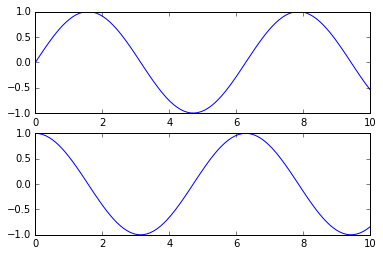

In [16]:
# Создаем сетку графиков
# ax будет массивом из двух объектов Axes
fig, ax = plt.subplots(2)

# Вызываем метод plot() соответствующего объекта
ax[0].plot(x, np.sin(x))
ax[1].plot(x, np.cos(x));

В случае простых графиков выбор интерфейса в основном вопрос личных предпочтений, но по мере усложнения графиков ОО-подход становится необходимостью. В этой главе мы будем переключаться между MATLAB-подобным и объектно-ориентированными интерфейсами в зависимости от того, какой из них удобнее для конкреиной задачи. В большинстве случаев в коде приходится всего лишь заменить **plt.plot()** на **ax.plot()** и не более того, но есть несколько нюансов на которые мы будем обращать внимание в следующих разделах.

# Простые линейные графики

Вероятно, простейшим из всех графиков является визуализация отдельной функции *y = f(x)*. В этом разделе мы рассмотрим создание простого графика такого типа. Как и во всех следующих разделах, начнем с настройки блокнота для построения графиков и импорта функций, которые будем использовать:

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

Во всех графиках Matplotlib мы начинаем с создания рисунка и системы координат. В простейшем случае рисунок и систему координат можно создать следующим образом:

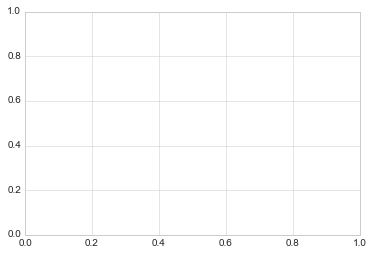

In [18]:
fig = plt.figure()
ax = plt.axes()

В библиотеке Matplotlib можно рассматривать *рисунок* (экземпляр класса **plt.Figure**) как единый контейнер, содержащий все объекты, представляющие систему координат, графику, текст и метки. Система координат (она же - *оси координат*, экземпляры класса **plt.Axes**) - то, что вы видите выше: ограничивающий прямоугольник с делениями и метками в котором потом будут находиться составляющие нашу визуализацию элементы графика. Далее будет использоваться имя переменной **fig** для экземпляра рисунка и **ax** для экземпляров системы координат или группы экземпляров систем координат.

После создания осей можно применить функцию **ax.plot()** для построения графика данных. Начнем с простой синусоиды: 

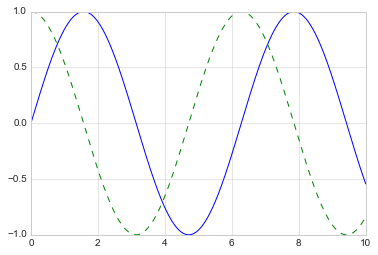

In [23]:
fig = plt.figure()
ax = plt.axes() # После выполнения этой строки будет выведена сетка координат.

x = np.linspace(0, 10, 1000)
ax.plot(x, np.sin(x))
ax.plot(x, np.cos(x), '--');

# Настройка графика: цвета и стили линий

стр 270.